# Crime in Costa Rica from 2017 to 2021

Importing modules and data set

In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
#import seaborn as sns
import re
from datetime import datetime
plt.style.use('seaborn')

Now, with pandas, we import the data set from a .csv file and take a look at the header. 

In [3]:
df = pd.read_csv('crime_costa_rica_2017-2021.csv')
df.head()

,Crime,SubCrime,Date,Hour,Victim,SubVictim,Age,Gender,Nationality,Province,Canton,Year,Month,Day,Weekday
0,ASALTO,ARMA BLANCA,2017-01-05,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,ALAJUELA,ALAJUELA,2017,1,5,3
1,ASALTO,ARMA BLANCA,2017-01-08,00:00:00 - 02:59:59,PERSONA,USUARIO SERVICIO PUBLICO/PRIVADO [PERSONA],Mayor de edad,MUJER,COSTA RICA,ALAJUELA,ALAJUELA,2017,1,8,6
2,ASALTO,ARMA BLANCA,2017-01-09,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,SAN JOSE,SAN JOSE,2017,1,9,0
3,ASALTO,ARMA BLANCA,2017-01-11,00:00:00 - 02:59:59,VEHICULO,AUTOMOVIL [VEHICULO],Mayor de edad,HOMBRE,COSTA RICA,ALAJUELA,SAN RAMON,2017,1,11,2
4,ASALTO,ARMA BLANCA,2017-01-12,15:00:00 - 17:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,NICARAGUA,CARTAGO,LA UNION,2017,1,12,3


***Cleaning the data***

After noting the different fields. I want to observe further if we can discard some columns as they may have redundant or disposable data. 

In [4]:
# The column 'Age' doesn't really provide this info but an incomplete segmentation of age groups for each 
# person who made the report. 

df['Age'].value_counts()

Mayor de edad    219349
Desconocido       15860
Adulto Mayor      14373
Menor de edad      7879
Name: Age, dtype: int64

In [5]:
# Similarly, the column "Hour" doesn't show the exact time of report but 3 hour time frames. 

df['Hour'].value_counts()

00:00:00 - 02:59:59    51036
18:00:00 - 20:59:59    44622
15:00:00 - 17:59:59    32840
21:00:00 - 23:59:59    32018
12:00:00 - 14:59:59    31488
09:00:00 - 11:59:59    27675
06:00:00 - 08:59:59    20419
03:00:00 - 05:59:59    17363
Name: Hour, dtype: int64

In [6]:
# I will keep these columns anyways, but rename them:

df = df.rename(columns={'Age':'Age_group',
                       'Hour':'Time_frame'})

# I will also discard the column "SubVictim" since for our purposes is redundant with "Victim". 

column_to_drop = ['SubVictim']             
df.drop(column_to_drop, inplace=True, axis=1)


# Since I want to relate each row with a real number and the index starts at 0, let's change the index start:
df.index = df.index + 1


# Also, for consistency and readability, I'll change all values to first letter uppercase with applymap():
df = df.applymap(lambda s: s.title() if type(s) == str else s)


# Since I want to relate each row with a real number and the index starts at 0, let's change the index start:
df.index = df.index + 1


# Also, for consistency and readability, I'll change all values to first letter uppercase with applymap():
df = df.applymap(lambda s: s.title() if type(s) == str else s)


df.head(1)

,Crime,SubCrime,Date,Time_frame,Victim,Age_group,Gender,Nationality,Province,Canton,Year,Month,Day,Weekday
2,Asalto,Arma Blanca,2017-01-05,18:00:00 - 20:59:59,Persona,Mayor De Edad,Mujer,Costa Rica,Alajuela,Alajuela,2017,1,5,3


Let's continue to further tidy up  the fields by checking and correcting data types:

In [7]:
df.dtypes

Crime          object
SubCrime       object
Date           object
Time_frame     object
Victim         object
Age_group      object
Gender         object
Nationality    object
Province       object
Canton         object
Year            int64
Month           int64
Day             int64
Weekday         int64
dtype: object

In [8]:
# We can see that the column "Date" is being handled as a string. I will convert it
# to datetime.

df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)
df['Date'].dtype

dtype('<M8[ns]')

In [9]:
# To better handle the time frame I will split to two columns.
df[['Time_start', 'Time_end']] = df['Time_frame'].str.split('-', expand=True)

# I will only use the first column (convert it to datetime and extract just hours and minutes),
# since every time frame means 3 hours:

df['Time_start'] = pd.to_datetime(df['Time_start']).dt.strftime('%H:%M')

new_columns_to_drop = ['Time_frame', 'Time_end']             
df.drop(new_columns_to_drop, inplace=True, axis=1)


In [10]:
# I also want to see the 'Weekday' as a word. I change the fields, with 'apply()' and defining a function:

def get_day_name(item):

        if item == 0:
            return 'Monday'
        elif item == 1:
            return 'Tuesday'
        elif item == 2:
            return 'Wednesday'
        elif item == 3:
            return 'Thursday'
        elif item == 4:
            return 'Friday'
        elif item == 5:
            return 'Saturday'
        else: 
            return 'Sunday'

df['Weekday'] = df['Weekday'].apply(get_day_name)


df.head(3)

,Crime,SubCrime,Date,Victim,Age_group,Gender,Nationality,Province,Canton,Year,Month,Day,Weekday,Time_start
2,Asalto,Arma Blanca,2017-01-05,Persona,Mayor De Edad,Mujer,Costa Rica,Alajuela,Alajuela,2017,1,5,Thursday,18:00
3,Asalto,Arma Blanca,2017-01-08,Persona,Mayor De Edad,Mujer,Costa Rica,Alajuela,Alajuela,2017,1,8,Sunday,00:00
4,Asalto,Arma Blanca,2017-01-09,Persona,Mayor De Edad,Hombre,Costa Rica,San Jose,San Jose,2017,1,9,Monday,18:00


In [11]:
# Now that we have the desired columns, let's check for missing values in the dataframe with a boolean mask:
df.isna().any()

Crime          False
SubCrime       False
Date           False
Victim         False
Age_group      False
Gender         False
Nationality    False
Province       False
Canton         False
Year           False
Month          False
Day            False
Weekday        False
Time_start     False
dtype: bool

***ANALYSIS & PLOTTING***

Costa Rica has seven provinces, of which San José is the capital and the most populated city. With just a look at the data, it seems that San José has the overall greatest number of crime reports. 

I want to know: 
1) How San José's reports compare to the other provinces' reports?  
2) How have these differences shifted over the timespan? 

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Number of reports')]

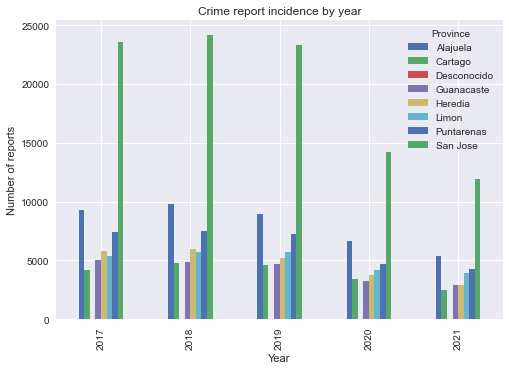

In [12]:
# Defining a new profile variable with 'groupby' and plotting it:

province_profile = df.groupby(["Year", "Province"])["Crime"].count()

(
    province_profile
     .unstack()
     .plot(title="Crime report incidence by year", kind='bar')
     .set(xlabel = "Year", ylabel = "Number of reports")
)

****Reduced during the first two years of pandemic (2021 reports end on October).***

Definición de categorías de crimen

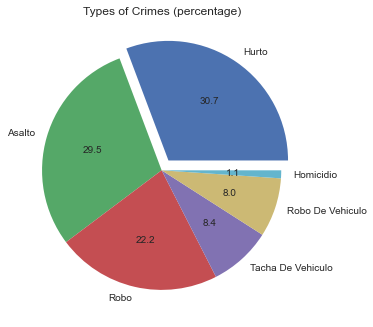

In [13]:
crime_type_percent = (df['Crime'].value_counts(normalize=True) * 100)

# Let's build a pie graph for crime types: 
plt.pie(crime_type_percent,labels=[x for x in crime_type_percent.keys()],autopct='%0.1f',explode=[0.1,0,0,0,0,0]) 

# Label the graph: 
plt.title('Types of Crimes (percentage)') 
#plt.savefig('/Users/luissalas/Desktop/crimen_project',dpi=300,bbox_inches='tight') 
plt.show();

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Number of reports')]

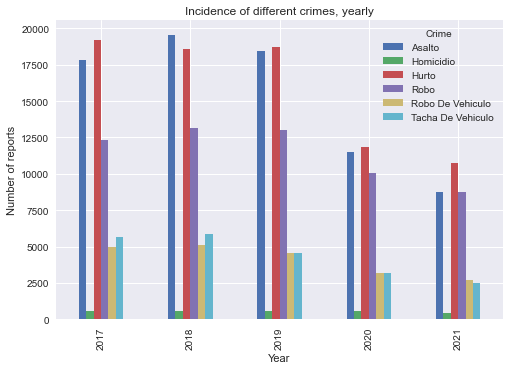

In [14]:
yearly_crimetype_profile = df.groupby(["Year", "Crime"])["Crime"].count()

(
    yearly_crimetype_profile
     .unstack()
     .plot(title="Incidence of different crimes, yearly", kind='bar')
     .set(xlabel = "Year", ylabel = "Number of reports")
)


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Number of reports')]

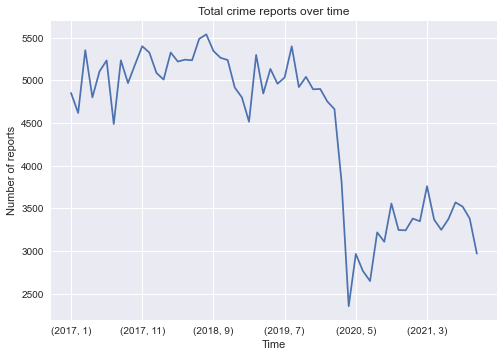

In [15]:
crime_monthly = df.groupby(["Year", "Month"])["Crime"].count()

(
    crime_monthly
     #.unstack()
     .plot(title="Total crime reports over time", kind='line')
     .set(xlabel = "Time", ylabel = "Number of reports")
)

[Text(0.5, 0, 'Canton'), Text(0, 0.5, 'Number of reports')]

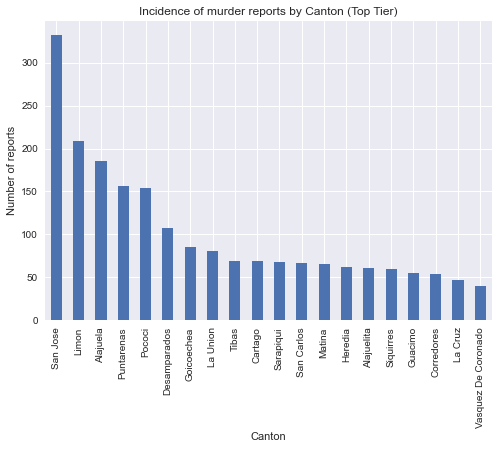

In [94]:
murders = df.loc[(df['Crime']=='Homicidio')]

murders_by_canton = murders.groupby(["Canton"])["Crime"].count()


top_canton_murder = murders_by_canton.sort_values(ascending=False).head(20)


(
    top_canton_murder
     #.unstack()
     .plot(title="Incidence of murder reports by Canton (Top Tier)", kind='bar')
     .set(xlabel = "Canton", ylabel = "Number of reports")
)


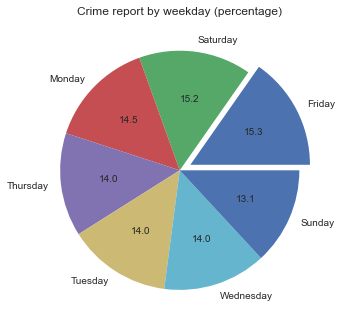

In [104]:
crime_weekday = df.groupby(["Weekday"])["Crime"].count()
crime_weekday_percent = (df['Weekday'].value_counts(normalize=True) * 100)

# Let's build a pie graph for crime types: 
plt.pie(crime_weekday_percent,labels=[x for x in crime_weekday_percent.keys()],autopct='%0.1f',explode=[0.1,0,0,0,0,0,0]) 

# Label the graph: 
plt.title('Crime report by weekday (percentage)') 
#plt.savefig('/Users/luissalas/Desktop/crimen_project',dpi=300,bbox_inches='tight') 
plt.show();

No significant difference of report numbers between weekdays. 

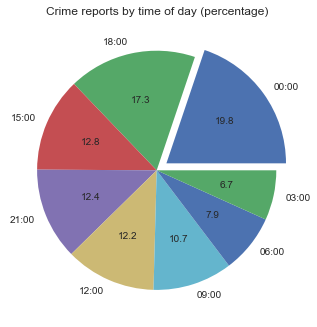

In [107]:
crime_hours = df.groupby(["Time_start"])["Crime"].count()
crime_hours_percent = (df['Time_start'].value_counts(normalize=True) * 100)

# Let's build a pie graph for crime types: 
plt.pie(crime_hours_percent,labels=[x for x in crime_hours_percent.keys()],autopct='%0.1f',explode=[0.1,0,0,0,0,0,0,0]) 

# Label the graph: 
plt.title('Crime reports by time of day (percentage)') 
#plt.savefig('/Users/luissalas/Desktop/crimen_project',dpi=300,bbox_inches='tight') 
plt.show();

In [103]:
# If we wanted to reexport the edited dataframe:
#df.to_csv('crime_reports_Costa_Rica.csv', index=True)